In [1]:
import matplotlib
matplotlib.use('TkAgg')
%matplotlib inline
from simulation import *

Generating mGraph
----- DONE
Getting layout
----- DONE
Setting default attributes
----- DONE
Choosing the source
----- DONE
Choosing the monitoring nodes
----- DONE
Mlist :  [48, 0, 78, 120, 0, 79, 1, 149, 51, 2] 
Slist :  [133]


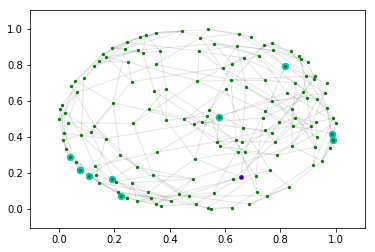

Starting infection


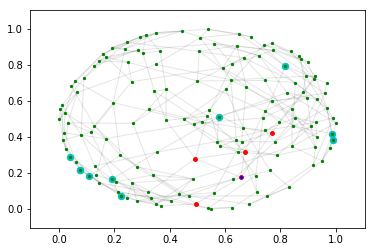

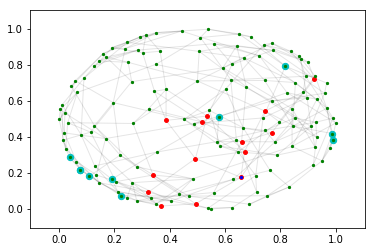

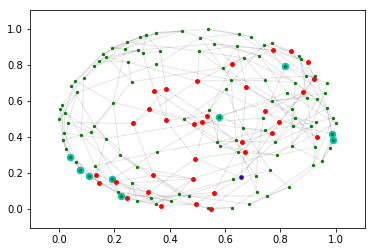

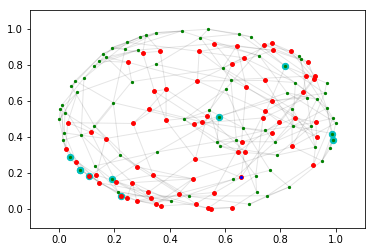

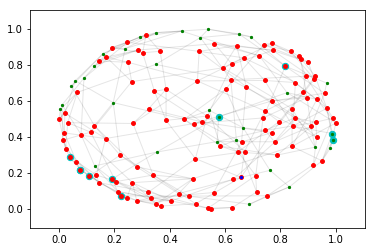

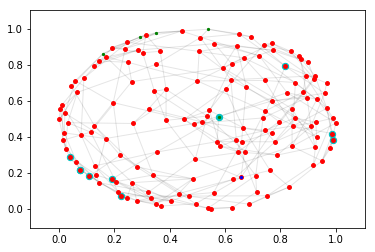

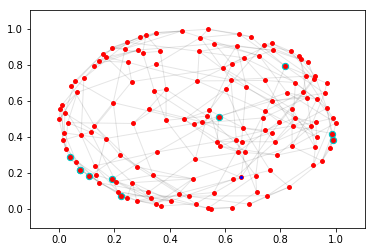

In [2]:
figureList = list()
# Parameters definition
numRumors = 1
maxThreshold = 1
numMonitors = 10
propagProba = 1
numNodes = 150
linkProba = 0.2
monitorTrigger = list()
numStep = 100



Graph, Pos, rumorSources, monitorsList = generateGraphReady(numNodes,linkProba,maxThreshold,numRumors,numMonitors)

fig1 =  drawColoredGraph(Graph, Pos, numRumors, rumorSources, monitorsList)


print("Starting infection")
infections = [[] for n in range(numRumors)]

infected = getInfectedList(Graph,numRumors)

j=0

while(len(infected)< len(Graph.nodes())):

    Graph = infectionForward(Graph, propagProba, numRumors)
    infected = getInfectedList(Graph,numRumors)

    # j+1 because j=0 is step 1
    monitorTrigger = updateMonitorTrig(j+1,monitorTrigger,monitorsList,Graph,numRumors)
    j += 1
    fig2 = drawColoredGraph(Graph, Pos, numRumors, rumorSources, monitorsList)

In [3]:
sets = list()
for i in range(len(monitorTrigger)):
    set1 =findSet(Graph,monitorTrigger[i][0],monitorTrigger[i][2])
    sets.append(set(set1))
    
source = set.intersection(*sets)

try:
    print("Identified Source = ",list(source)[0],"\nReal Source = ",rumorSources[0])
except:
    print("Real Source = ",rumorSources[0])
    print("No sources identified")
    printMonitorTrig(monitorTrigger)
    print('\n\nDifferent sets')
    print(*sets,sep='\n')

Identified Source =  133 
Real Source =  133
